In [1]:
import matplotlib
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#x = [x**2 for x in range(1,100)]
#y = range(1, 100)

In [4]:
#plt.plot(x, y, 'ro')
#plt.show()

In [5]:
week1 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_160409.txt")
week2 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_160416.txt")
week3 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_160423.txt")
week4 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_160430.txt")
week5 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_160507.txt")
week6 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_160514.txt")
week7 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_160521.txt")
week8 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_160528.txt")
week9 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_160604.txt")
#mtadf = pd.concat([week1, week2, week3, week4, week5, week6, week7, week8, week9], )

In [6]:
week1['week_flg'] = 1
week2['week_flg'] = 2
week3['week_flg'] = 3
week4['week_flg'] = 4
week5['week_flg'] = 5
week6['week_flg'] = 6
week7['week_flg'] = 7
week8['week_flg'] = 8

In [7]:
mtadf = pd.concat([week1, week2, week3, week4, week5, week6, week6, week7, week8], ignore_index=True)
len(mtadf)


1747742

In [290]:
mtadf.shape

(1747742, 14)

In [8]:
#week1 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_160409.txt")
#week2 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_160416.txt")

In [124]:
mtadf.dtypes

C/A                  object
UNIT                 object
SCP                  object
STATION              object
LINENAME             object
DATE         datetime64[ns]
TIME                 object
ENTRIES               int64
EXITS                 int64
week_flg              int64
date_time    datetime64[ns]
statline             object
dow                   int64
entrydiff           float64
dtype: object

In [9]:
#mtadf = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_160409.txt")
mtadf = mtadf.rename(columns=lambda x: x.strip())#stripping trailing/leading blanks

In [10]:
mtadf['date_time'] =pd.to_datetime(mtadf['DATE'] + ' ' + mtadf['TIME'],format="%m/%d/%Y %H:%M:%S")
mtadf['DATE'] = pd.to_datetime(mtadf['DATE'], format="%m/%d/%Y")

In [11]:
mtadf['statline'] = mtadf['STATION'] + ' ' +mtadf['LINENAME']
mtadf = mtadf.drop(axis=1, labels = ['DIVISION', 'DESC']) #drop columns to create df with only degrees
mtadf.head()

,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,ENTRIES,EXITS,week_flg,date_time,statline
0,A002,R051,02-00-00,59 ST,NQR456,2016-04-02,00:00:00,5600838,1896290,1,2016-04-02 00:00:00,59 ST NQR456
1,A002,R051,02-00-00,59 ST,NQR456,2016-04-02,04:00:00,5600863,1896293,1,2016-04-02 04:00:00,59 ST NQR456
2,A002,R051,02-00-00,59 ST,NQR456,2016-04-02,08:00:00,5600877,1896313,1,2016-04-02 08:00:00,59 ST NQR456
3,A002,R051,02-00-00,59 ST,NQR456,2016-04-02,12:00:00,5600922,1896375,1,2016-04-02 12:00:00,59 ST NQR456
4,A002,R051,02-00-00,59 ST,NQR456,2016-04-02,16:00:00,5601172,1896445,1,2016-04-02 16:00:00,59 ST NQR456


In [12]:
mtadf['dow'] = mtadf['DATE'].apply(datetime.weekday) #have to use apply to iterate over series

In [13]:
#mtadf.head(1000)

In [14]:
mtadf= mtadf.sort_values(by=['statline','C/A','UNIT','SCP','date_time'])
mtadf

,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,ENTRIES,EXITS,week_flg,date_time,statline,dow
29557,H007,R248,00-00-00,1 AV,L,2016-04-02,00:00:00,10910340,11896537,1,2016-04-02 00:00:00,1 AV L,5
29558,H007,R248,00-00-00,1 AV,L,2016-04-02,04:00:00,10910536,11896872,1,2016-04-02 04:00:00,1 AV L,5
29559,H007,R248,00-00-00,1 AV,L,2016-04-02,08:00:00,10910654,11897125,1,2016-04-02 08:00:00,1 AV L,5
29560,H007,R248,00-00-00,1 AV,L,2016-04-02,12:00:00,10911292,11897807,1,2016-04-02 12:00:00,1 AV L,5
29561,H007,R248,00-00-00,1 AV,L,2016-04-02,16:00:00,10912096,11898778,1,2016-04-02 16:00:00,1 AV L,5
29562,H007,R248,00-00-00,1 AV,L,2016-04-02,20:00:00,10912912,11899944,1,2016-04-02 20:00:00,1 AV L,5
29563,H007,R248,00-00-00,1 AV,L,2016-04-03,00:00:00,10913494,11900805,1,2016-04-03 00:00:00,1 AV L,6
29564,H007,R248,00-00-00,1 AV,L,2016-04-03,04:00:00,10913732,11901247,1,2016-04-03 04:00:00,1 AV L,6
29565,H007,R248,00-00-00,1 AV,L,2016-04-03,08:00:00,10913817,11901410,1,2016-04-03 08:00:00,1 AV L,6
29566,H007,R248,00-00-00,1 AV,L,2016-04-03,12:00:00,10914295,11902028,1,2016-04-03 12:00:00,1 AV L,6


In [15]:
mtadf['entrydiff'] = mtadf.groupby(by=[('statline')])['ENTRIES'].diff()
mtadf

,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,ENTRIES,EXITS,week_flg,date_time,statline,dow,entrydiff
29557,H007,R248,00-00-00,1 AV,L,2016-04-02,00:00:00,10910340,11896537,1,2016-04-02 00:00:00,1 AV L,5,NaN
29558,H007,R248,00-00-00,1 AV,L,2016-04-02,04:00:00,10910536,11896872,1,2016-04-02 04:00:00,1 AV L,5,196.0
29559,H007,R248,00-00-00,1 AV,L,2016-04-02,08:00:00,10910654,11897125,1,2016-04-02 08:00:00,1 AV L,5,118.0
29560,H007,R248,00-00-00,1 AV,L,2016-04-02,12:00:00,10911292,11897807,1,2016-04-02 12:00:00,1 AV L,5,638.0
29561,H007,R248,00-00-00,1 AV,L,2016-04-02,16:00:00,10912096,11898778,1,2016-04-02 16:00:00,1 AV L,5,804.0
29562,H007,R248,00-00-00,1 AV,L,2016-04-02,20:00:00,10912912,11899944,1,2016-04-02 20:00:00,1 AV L,5,816.0
29563,H007,R248,00-00-00,1 AV,L,2016-04-03,00:00:00,10913494,11900805,1,2016-04-03 00:00:00,1 AV L,6,582.0
29564,H007,R248,00-00-00,1 AV,L,2016-04-03,04:00:00,10913732,11901247,1,2016-04-03 04:00:00,1 AV L,6,238.0
29565,H007,R248,00-00-00,1 AV,L,2016-04-03,08:00:00,10913817,11901410,1,2016-04-03 08:00:00,1 AV L,6,85.0
29566,H007,R248,00-00-00,1 AV,L,2016-04-03,12:00:00,10914295,11902028,1,2016-04-03 12:00:00,1 AV L,6,478.0


In [16]:
mtadf2 =mtadf[mtadf['TIME'] != '00:00:00']

In [17]:
mtadf2

,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,ENTRIES,EXITS,week_flg,date_time,statline,dow,entrydiff
29558,H007,R248,00-00-00,1 AV,L,2016-04-02,04:00:00,10910536,11896872,1,2016-04-02 04:00:00,1 AV L,5,196.0
29559,H007,R248,00-00-00,1 AV,L,2016-04-02,08:00:00,10910654,11897125,1,2016-04-02 08:00:00,1 AV L,5,118.0
29560,H007,R248,00-00-00,1 AV,L,2016-04-02,12:00:00,10911292,11897807,1,2016-04-02 12:00:00,1 AV L,5,638.0
29561,H007,R248,00-00-00,1 AV,L,2016-04-02,16:00:00,10912096,11898778,1,2016-04-02 16:00:00,1 AV L,5,804.0
29562,H007,R248,00-00-00,1 AV,L,2016-04-02,20:00:00,10912912,11899944,1,2016-04-02 20:00:00,1 AV L,5,816.0
29564,H007,R248,00-00-00,1 AV,L,2016-04-03,04:00:00,10913732,11901247,1,2016-04-03 04:00:00,1 AV L,6,238.0
29565,H007,R248,00-00-00,1 AV,L,2016-04-03,08:00:00,10913817,11901410,1,2016-04-03 08:00:00,1 AV L,6,85.0
29566,H007,R248,00-00-00,1 AV,L,2016-04-03,12:00:00,10914295,11902028,1,2016-04-03 12:00:00,1 AV L,6,478.0
29567,H007,R248,00-00-00,1 AV,L,2016-04-03,16:00:00,10915128,11902855,1,2016-04-03 16:00:00,1 AV L,6,833.0
29568,H007,R248,00-00-00,1 AV,L,2016-04-03,20:00:00,10915771,11903685,1,2016-04-03 20:00:00,1 AV L,6,643.0


In [18]:
mtadf2 = mtadf2[mtadf2['entrydiff'] > 0]

In [19]:
mtadf2['entrydiff'].describe()

count    1.199416e+06
mean     5.149224e+04
std      7.693440e+06
min      1.000000e+00
25%      2.900000e+01
50%      1.220000e+02
75%      3.170000e+02
max      2.126577e+09
Name: entrydiff, dtype: float64

In [20]:
mtadf2["entrydiff"].quantile(.999)

2667.5850000001956

In [21]:
#mtadf2["entrydiff"].value_counts()

In [22]:
mtadf2 = mtadf2[mtadf2['entrydiff'] < mtadf2["entrydiff"].quantile(.999)]

In [23]:
len(mtadf2)

1198216

In [24]:
len(mtadf)

1747742

In [25]:
mtadf2['entrydiff'].describe()

count    1.198216e+06
mean     2.261991e+02
std      2.861525e+02
min      1.000000e+00
25%      2.900000e+01
50%      1.220000e+02
75%      3.160000e+02
max      2.667000e+03
Name: entrydiff, dtype: float64

In [26]:
mtadf2['entrydiff'].argmin()

805421

In [27]:
mtadf.ix[134259]

C/A                         R170
UNIT                        R191
SCP                     00-03-00
STATION                   103 ST
LINENAME                       1
DATE         2016-04-07 00:00:00
TIME                    05:00:00
ENTRIES                  6893106
EXITS                    3799456
week_flg                       1
date_time    2016-04-07 05:00:00
statline                103 ST 1
dow                            3
entrydiff                      1
Name: 134259, dtype: object

In [28]:
mtadf2['entrydiff'].max()

2667.0

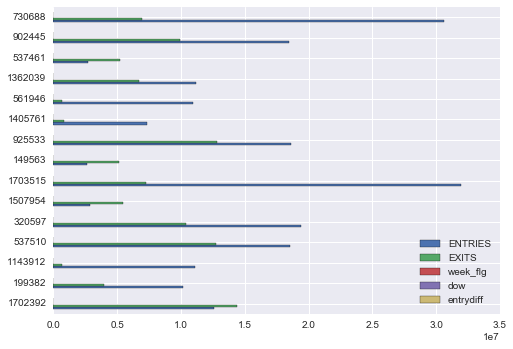

In [102]:
# mtadf2.nlargest(15,columns='entrydiff').plot(x= 'statline', y= 'entrydiff',kind='barh')
mtadf2.nlargest(15,columns='entrydiff').plot(kind='barh')

In [30]:
mtadf2.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DATE', 'TIME', 'ENTRIES',
       'EXITS', 'week_flg', 'date_time', 'statline', 'dow', 'entrydiff'],
      dtype='object')

In [31]:
mtadf3 = mtadf2.groupby(by=['statline'])['entrydiff'].sum()

In [32]:
mtadf3

statline
1 AV L                        1048538.0
103 ST 1                       661207.0
103 ST 6                       517652.0
103 ST BC                      243724.0
103 ST-CORONA 7                962656.0
104 ST A                        82014.0
104 ST JZ                      111009.0
110 ST 6                       667901.0
111 ST 7                       559347.0
111 ST A                       105795.0
111 ST J                       123106.0
116 ST 23                      641044.0
116 ST 6                       851854.0
116 ST BC                      374388.0
116 ST-COLUMBIA 1              780817.0
121 ST JZ                      115518.0
125 ST 1                       362489.0
125 ST 23                      605069.0
125 ST 456                    1310034.0
125 ST ACBD                   1353848.0
135 ST 23                      724448.0
135 ST BC                      290190.0
137 ST CITY COL 1              777457.0
138/GRAND CONC 45              158840.0
14 ST 123FLM                   

In [91]:
# mtadf3.plot?

In [99]:
# mtadf3a = mtadf3.nlargest(15)
# mtadf3a.sort_values(ascending=True).plot(kind='barh')

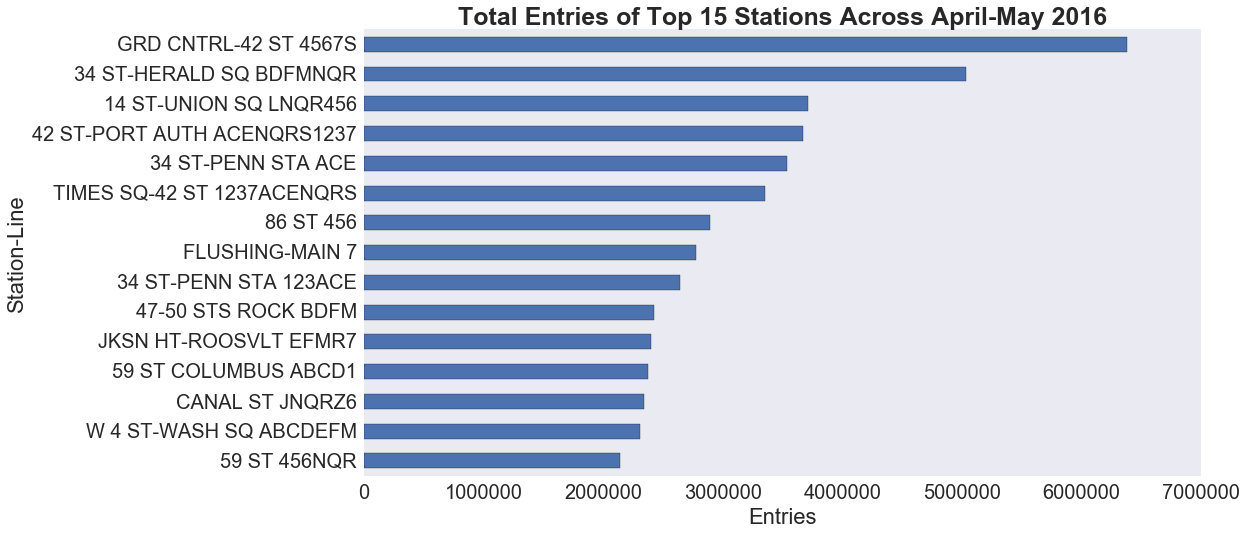

In [213]:
plt.figure(figsize=(15,8))
mtadf3.nlargest(15).sort_values(ascending=True).plot(kind='barh', grid=False)
plt.xlabel("Entries")
plt.ylabel("Station-Line")
plt.title("Total Entries of Top 15 Stations Across April-May 2016",fontsize=25, fontweight='bold')
ax.legend()
plt.show()
sns.set_style('dark')
sns.set(font_scale=1)

In [ ]:
Station Names   Flow    Count of Entrances  Flow/Entrances
34 ST-HERALD SQ BDFMNQR         5035010 11  457,728.18
GRD CNTRL-42 ST 4567S           6384809 15  425,653.93
42 ST-PORT AUTH ACENQRS1237     3674337 9   408,259.67
W 4 ST-WASH SQ ABCDEFM          2311829 6   385,304.83
14 ST-UNION SQ LNQR456          3711978 10  371,197.80
86 ST 456                       2894762 8   361,845.25
JKSN HT-ROOSVLT EFMR7           2403158 7   343,308.29
FLUSHING-MAIN 7                 2778742 10  277,874.20
TIMES SQ-42 ST 1237ACENQRS      3354597 13  258,045.92
34 ST-PENN STA ACE              3538270 16  221,141.88
59 ST COLUMBUS ABCD1            2379059 12  198,254.92
CANAL ST JNQRZ6                 2346221 14  167,587.21
34 ST-PENN STA 123ACE           2647402 16  165,462.63
59 ST 456NQR                    2145341 13  165,026.23
47-50 STS ROCK BDFM             2422287 17  142,487.47


In [34]:
mtadf4 = mtadf2.groupby(by=['statline','dow'])['entrydiff'].sum().reset_index()

In [155]:
# mtadf4

In [187]:
test= mtadf3.nlargest(15)
test=test.to_frame()
test.columns

Index(['entrydiff'], dtype='object')

In [190]:
mtadf3.nlargest(15)

statline
GRD CNTRL-42 ST 4567S          6384809.0
34 ST-HERALD SQ BDFMNQR        5035010.0
14 ST-UNION SQ LNQR456         3711978.0
42 ST-PORT AUTH ACENQRS1237    3674337.0
34 ST-PENN STA ACE             3538270.0
TIMES SQ-42 ST 1237ACENQRS     3354597.0
86 ST 456                      2894762.0
FLUSHING-MAIN 7                2778742.0
34 ST-PENN STA 123ACE          2647402.0
47-50 STS ROCK BDFM            2422287.0
JKSN HT-ROOSVLT EFMR7          2403158.0
59 ST COLUMBUS ABCD1           2379059.0
CANAL ST JNQRZ6                2346221.0
W 4 ST-WASH SQ ABCDEFM         2311829.0
59 ST 456NQR                   2145341.0
Name: entrydiff, dtype: float64

In [167]:
ax.legend?

Index(['GRD CNTRL-42 ST 4567S', '34 ST-HERALD SQ BDFMNQR',
       '14 ST-UNION SQ LNQR456', '42 ST-PORT AUTH ACENQRS1237',
       '34 ST-PENN STA ACE', 'TIMES SQ-42 ST 1237ACENQRS', '86 ST 456',
       'FLUSHING-MAIN 7', '34 ST-PENN STA 123ACE', '47-50 STS ROCK BDFM',
       'JKSN HT-ROOSVLT EFMR7', '59 ST COLUMBUS ABCD1', 'CANAL ST JNQRZ6',
       'W 4 ST-WASH SQ ABCDEFM', '59 ST 456NQR'],
      dtype='object', name='statline')


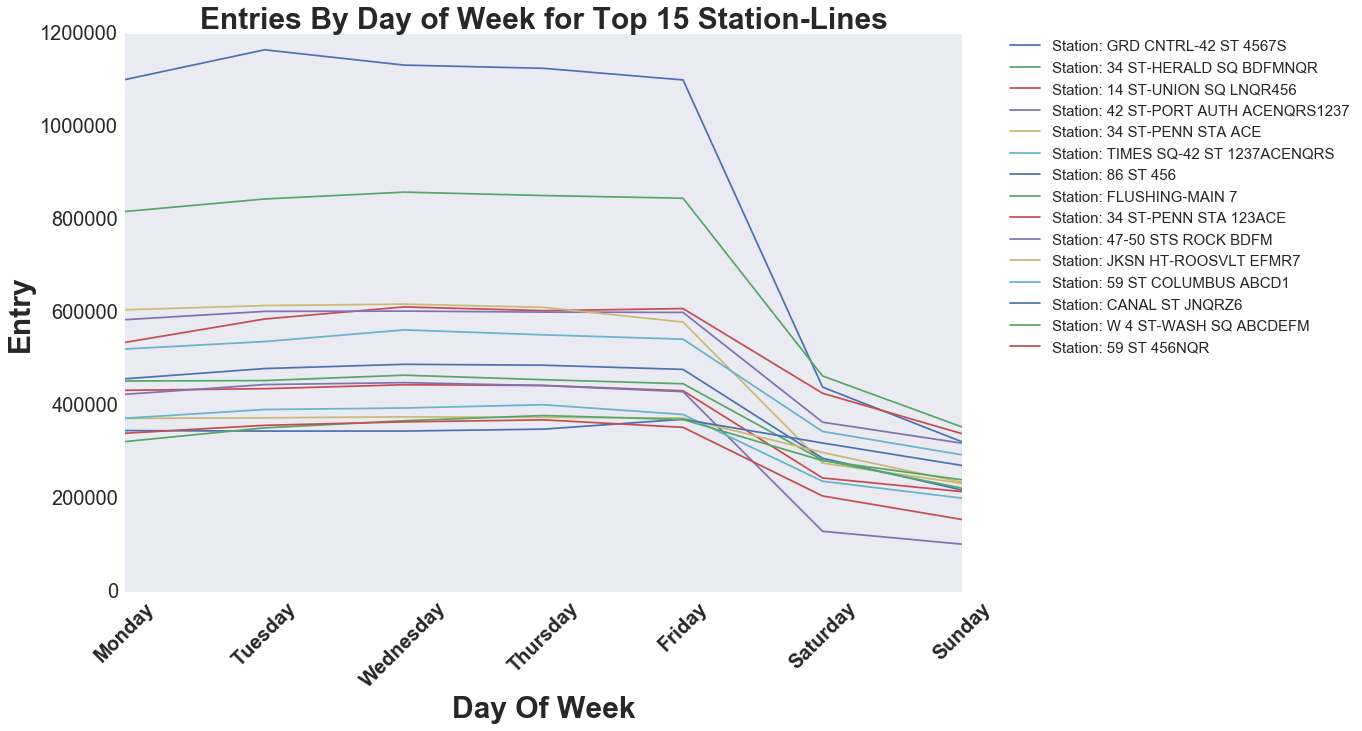

In [292]:
fig,ax = plt.subplots(figsize=(15,10))

sns.set_style("dark")

#stations = ["GRD CNTRL-42 ST 4567S", "34 ST-HERALD SQ BDFMNQR",'14 ST-UNION SQ LNQR456','42 ST-PORT AUTH ACENQRS1237','JKSN HT-ROOSVLT EFMR7'] #mtadf3.nlargest(15)
stations = mtadf3.nlargest(15).axes
print(stations[0])

my_xticks = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

for temp in stations[0]:
    dat = mtadf4[mtadf4['statline'] == temp]
    #print((dat["dow"]))
    #print(mtadf4["entrydiff"])
    plt.xticks(dat["dow"],my_xticks, rotation=45,fontsize=20, fontweight='bold')
    ax.plot(dat["dow"], dat["entrydiff"], label = "Station: {0}".format(temp))

plt.title("Entries By Day of Week for Top 15 Station-Lines",fontsize=30, fontweight='bold')#, grid=False)
plt.xlabel("Day Of Week",fontsize=30, fontweight='bold')
plt.ylabel("Entry",fontsize=30, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
plt.show()
sns.set(font_scale=3)

In [ ]:
mtadf5 = mtadf2.groupby(by=['statline','TIME','dow'])['entrydiff'].sum().reset_index()

In [ ]:
mtadf5["TIME"] = mtadf5["TIME"].apply(lambda x: int(x[:2]))

In [ ]:
mtadf5 = mtadf5[mtadf5['dow'] < 5]

In [ ]:
mtadf5 = mtadf5.groupby(by=['statline','TIME'])['entrydiff'].sum().reset_index()

In [219]:


ax.set_xticks?

Index(['GRD CNTRL-42 ST 4567S', '34 ST-HERALD SQ BDFMNQR',
       '14 ST-UNION SQ LNQR456', '42 ST-PORT AUTH ACENQRS1237',
       '34 ST-PENN STA ACE', 'TIMES SQ-42 ST 1237ACENQRS', '86 ST 456',
       'FLUSHING-MAIN 7', '34 ST-PENN STA 123ACE', '47-50 STS ROCK BDFM',
       'JKSN HT-ROOSVLT EFMR7', '59 ST COLUMBUS ABCD1', 'CANAL ST JNQRZ6',
       'W 4 ST-WASH SQ ABCDEFM', '59 ST 456NQR'],
      dtype='object', name='statline')


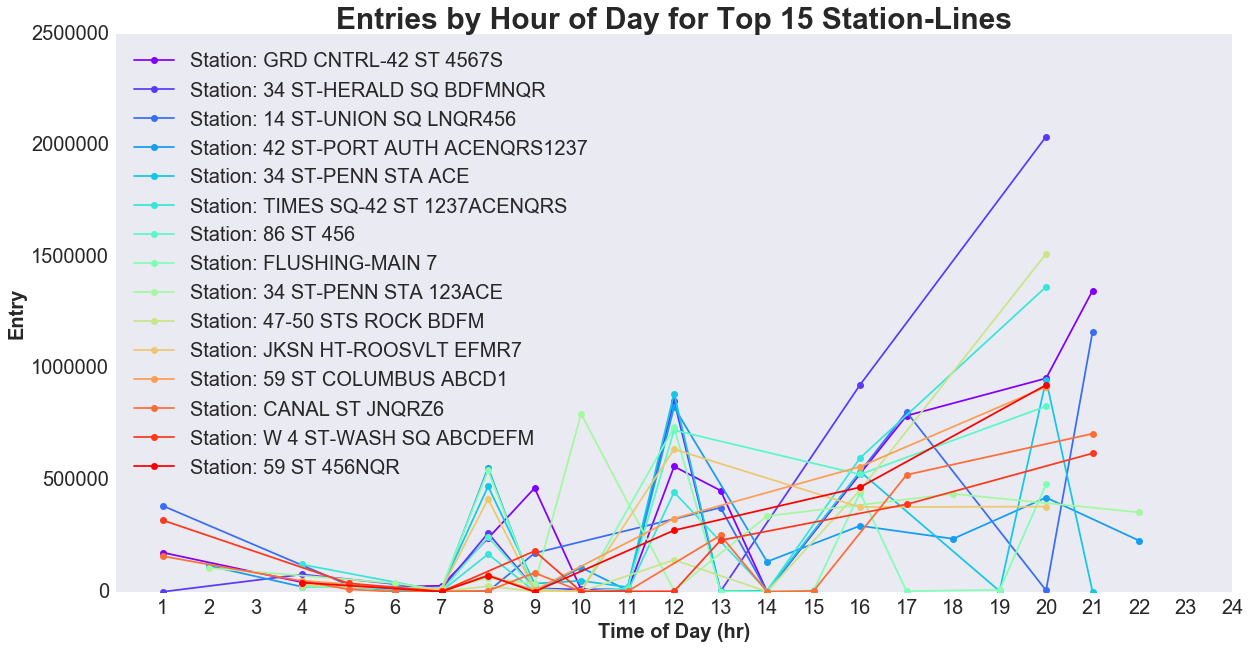

In [288]:
import matplotlib.cm as cm

fig,ax = plt.subplots(figsize=(20,10))
sns.set_style('dark')

#stations = ["GRD CNTRL-42 ST 4567S", "34 ST-HERALD SQ BDFMNQR",'14 ST-UNION SQ LNQR456','42 ST-PORT AUTH ACENQRS1237','JKSN HT-ROOSVLT EFMR7'] #mtadf3.nlargest(15)
stations = mtadf3.nlargest(15).axes
colors = iter(cm.rainbow(np.linspace(0, 1, len(stations[0]))))
print(stations[0])
#print(type(stations))
for temp in stations[0]:
    dat = mtadf5[mtadf5['statline'] == temp]
    #print((dat["dow"]))
    #print(mtadf4["entrydiff"])
    ax.plot(dat["TIME"], dat["entrydiff"], 'bo-',label = "Station: {0}".format(temp),color=next(colors))#,gride=False)
    ax.set_xlim([0,24])
    ax.set_xticks(np.arange(1,25))

plt.title('Entries by Hour of Day for Top 15 Station-Lines',fontsize=30, fontweight='bold')
plt.xlabel("Time of Day (hr)",fontsize=20, fontweight='bold')
plt.ylabel("Entry",fontsize=20, fontweight='bold')
ax.legend(loc="best")
plt.show()

sns.set(font_scale=2)

In [ ]:
plt.figure(figsize=(15,7))
# plt.figure()
# StatFlowDF2.nlargest(15).plot(kind='bar')
#df = StatFlowDS.sort_values(ascending=False)
ax = mtadf2.iloc[:11].plot(kind="barh")
ax.invert_yaxis()

In [ ]:
StatFlowDS = pd.Series(mtadf2[['statline','entrydiff']], name = 'DateValue')
# StatFlowDF2.to_csv('StatFlowDF2.csv')

In [ ]:
diff_df['sumentry'] = mtadf.groupby(by=['statline', 'date_time','dow','TIME']).sum().reset_index()

#df.groupby('userid').sum()
#diff_df.rename(columns = {'ENTRIES':'entrydiff', 'EXITS' :'exitdiff'}, inplace = True)
#print(len(diff_df))

In [ ]:
#pd.value_counts(mtadf['UNIT'].values)
len(diff_df)


In [39]:
mtadf.dtypes

C/A                  object
UNIT                 object
SCP                  object
STATION              object
LINENAME             object
DATE         datetime64[ns]
TIME                 object
ENTRIES               int64
EXITS                 int64
week_flg              int64
date_time    datetime64[ns]
statline             object
dow                   int64
entrydiff           float64
dtype: object